In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

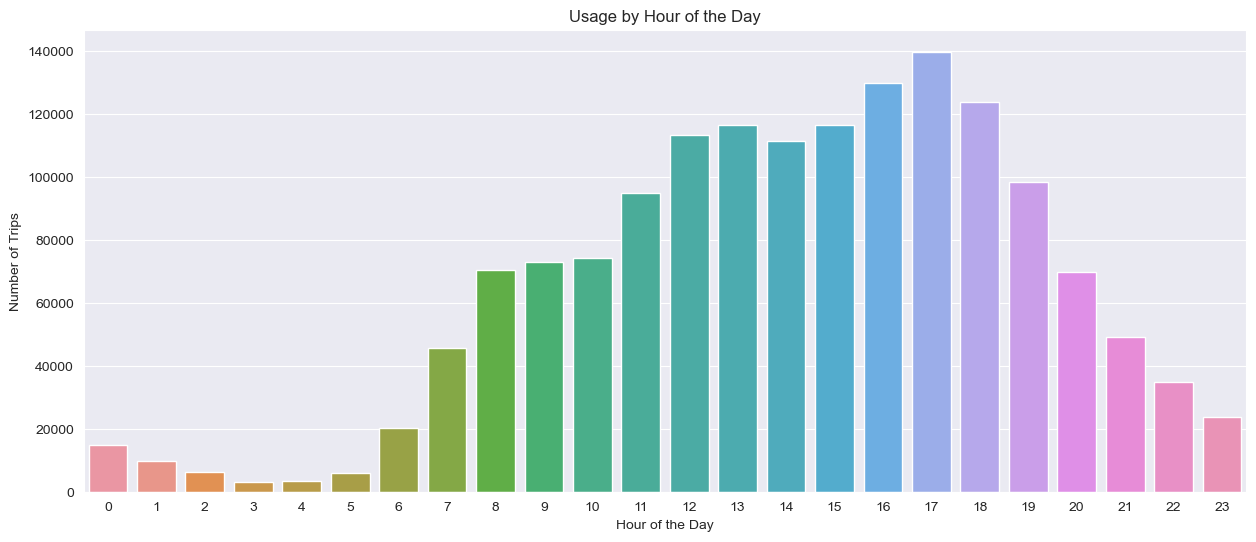

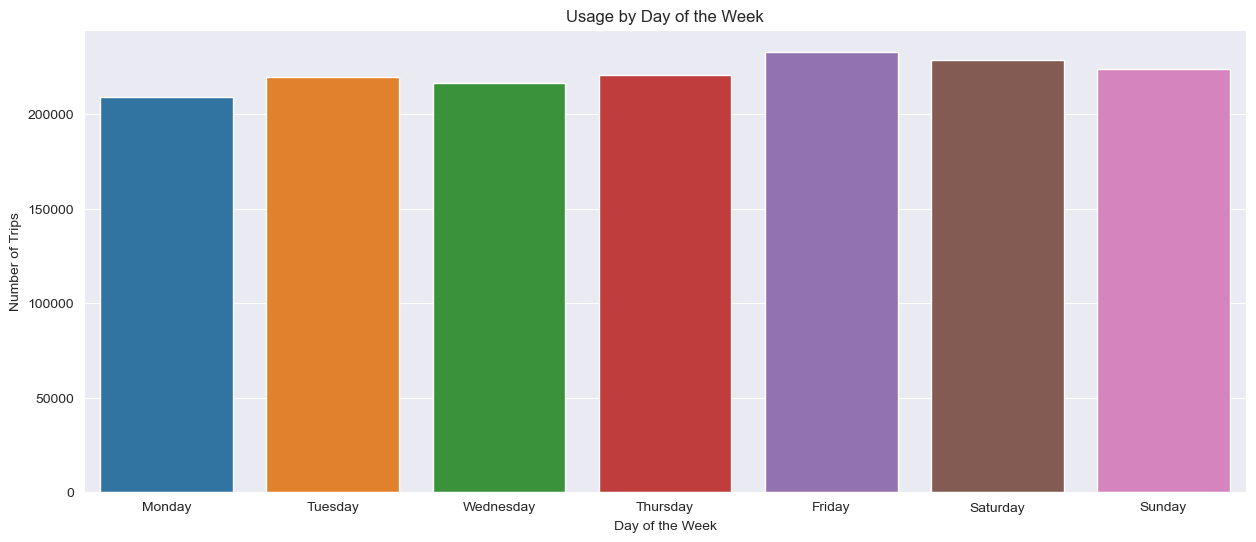

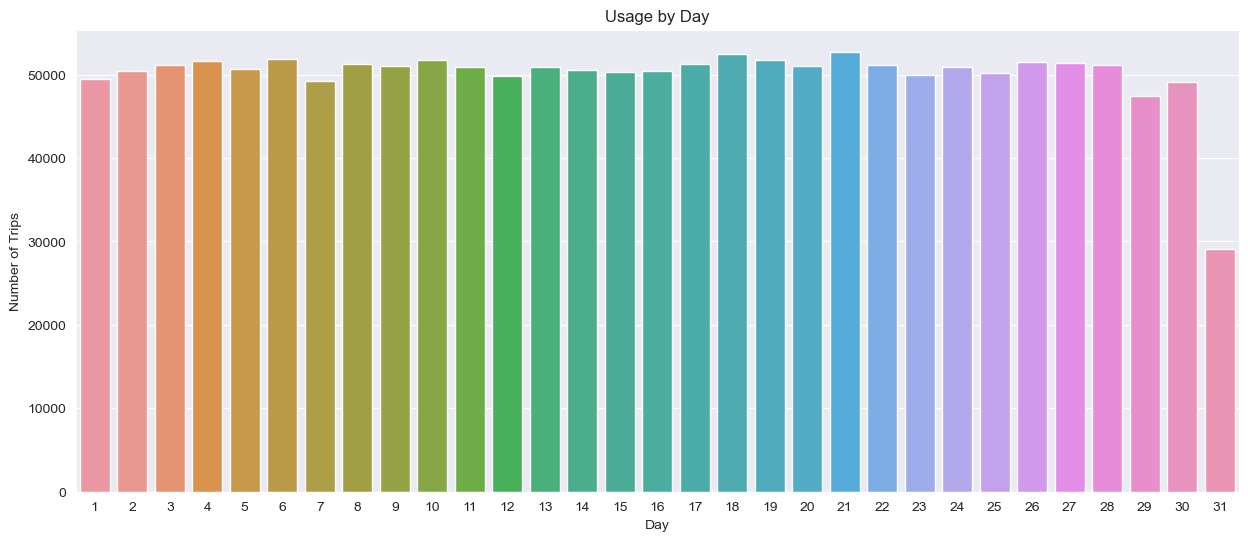

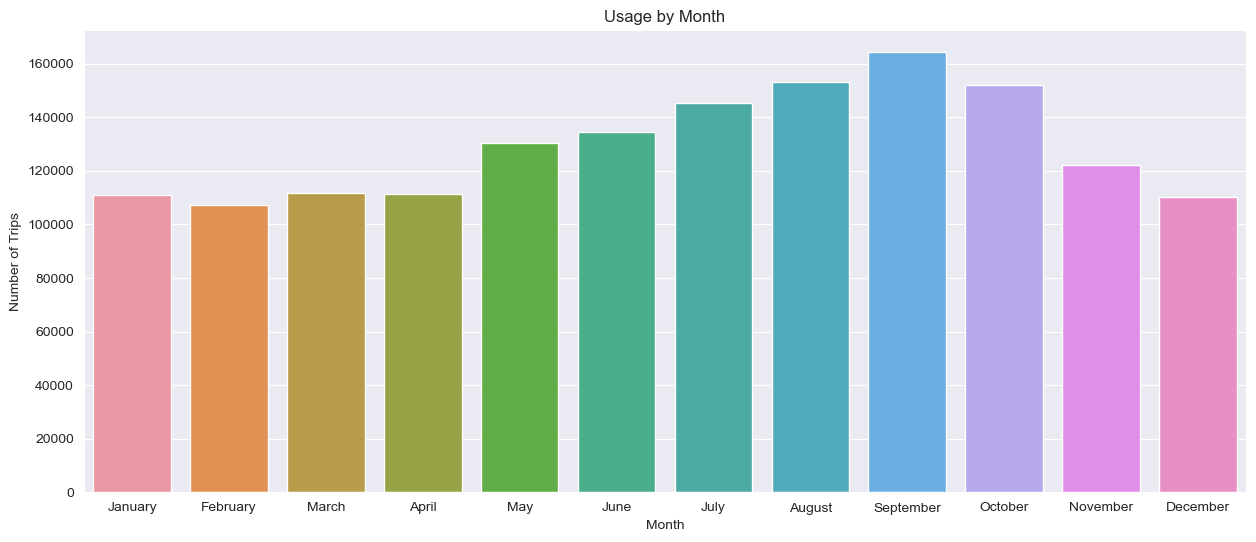

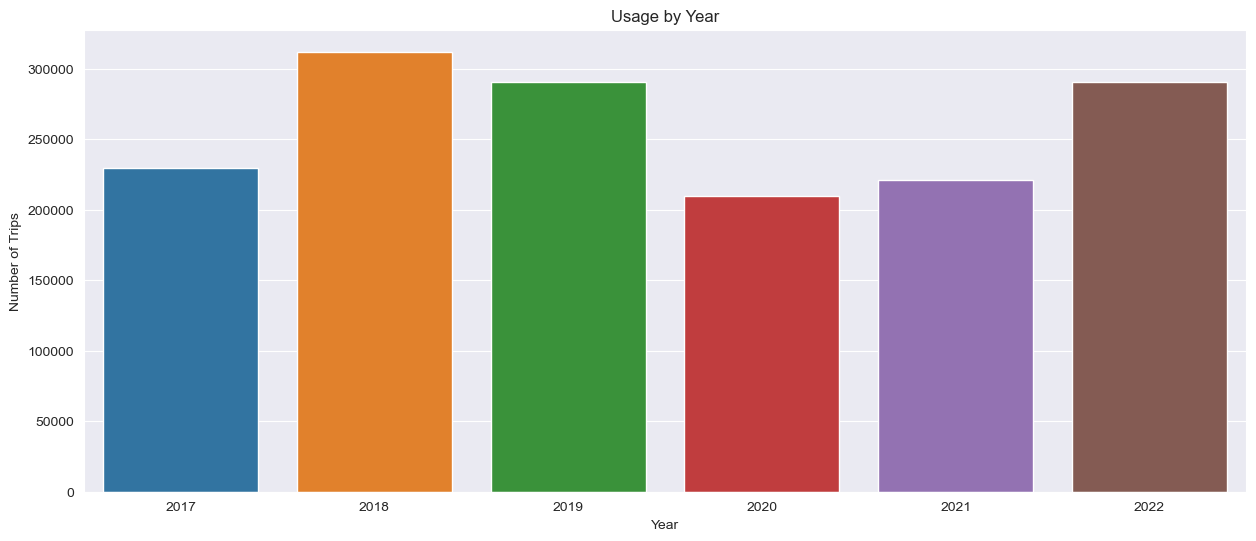

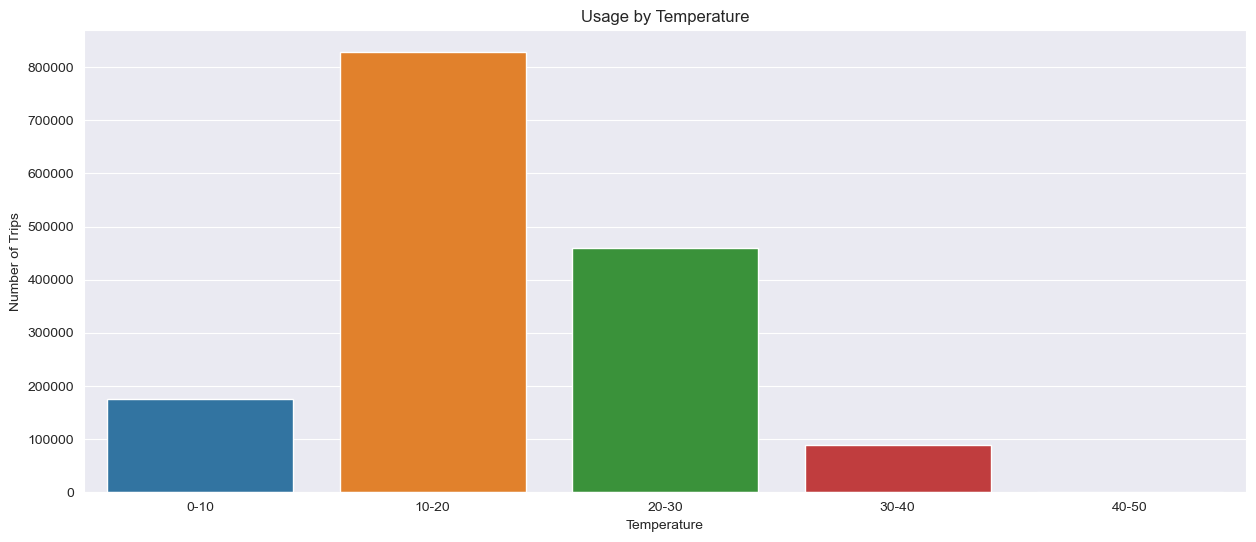

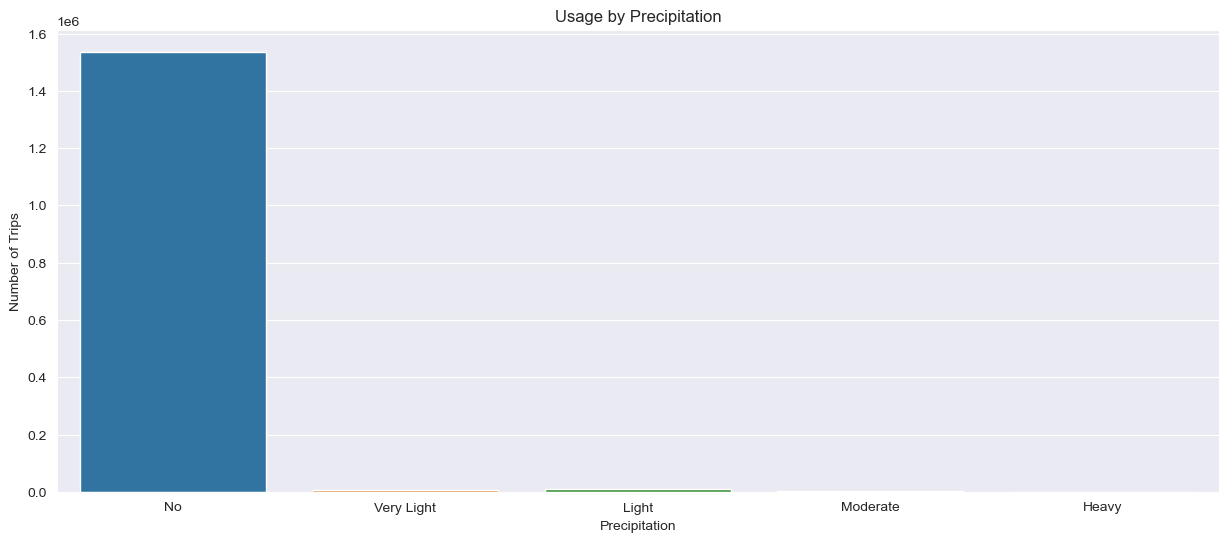

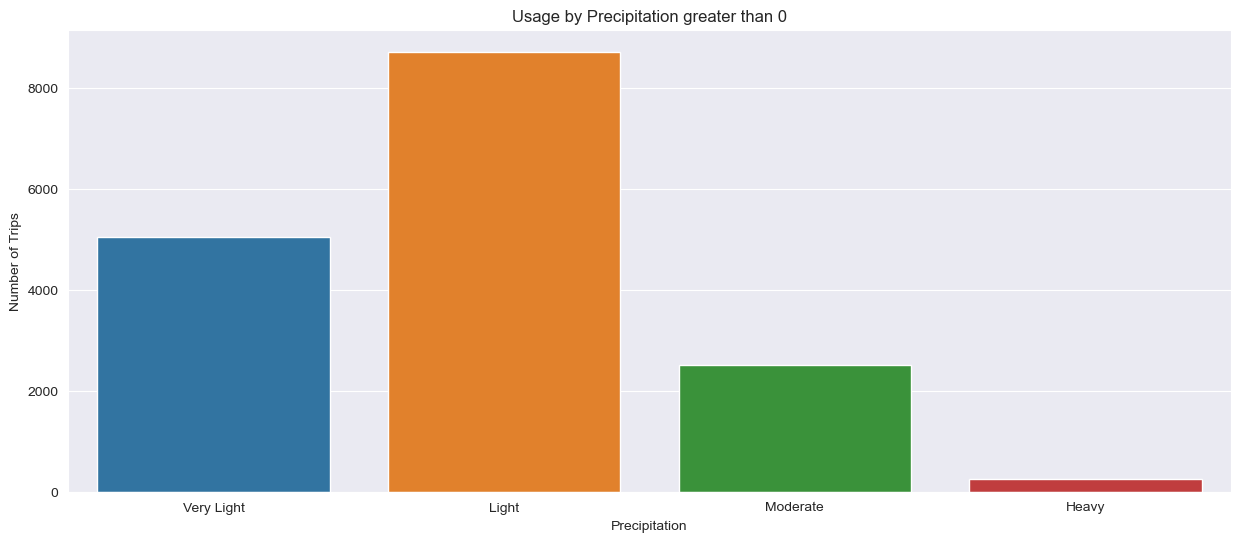

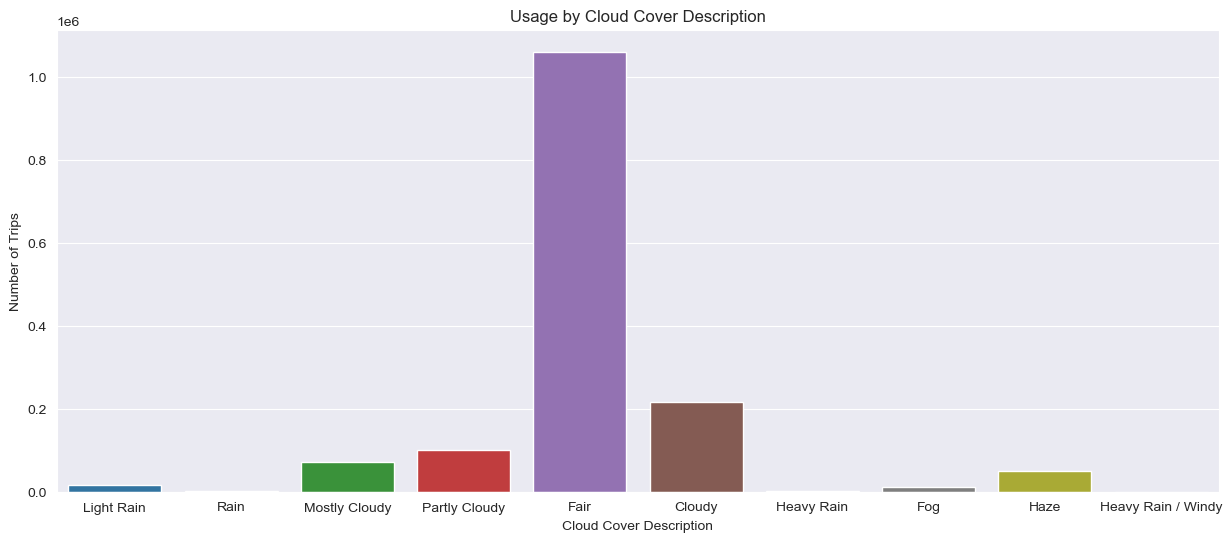

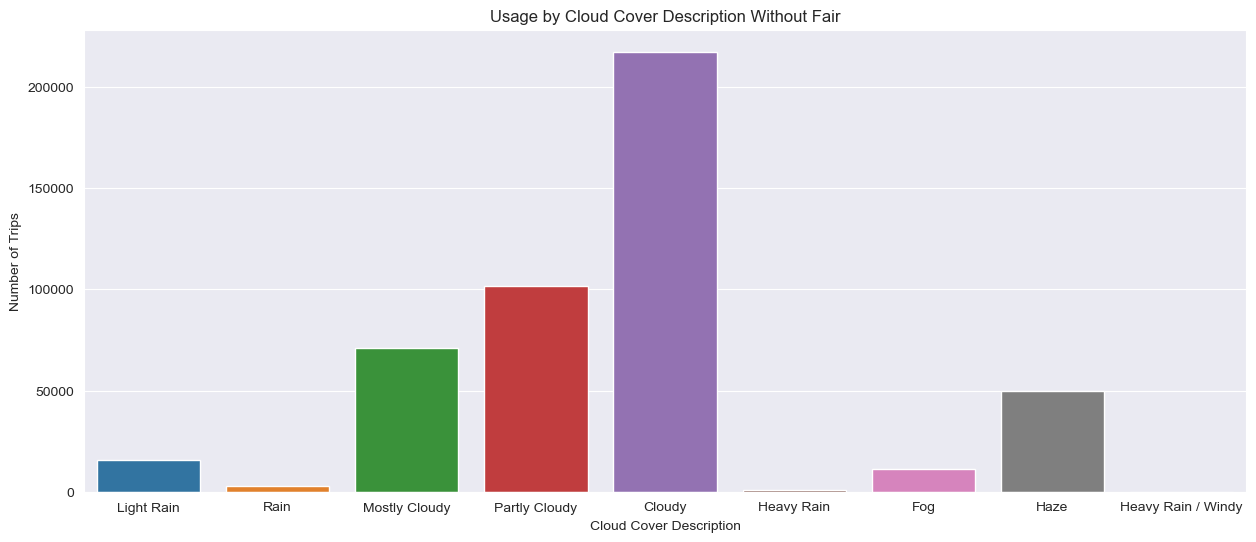

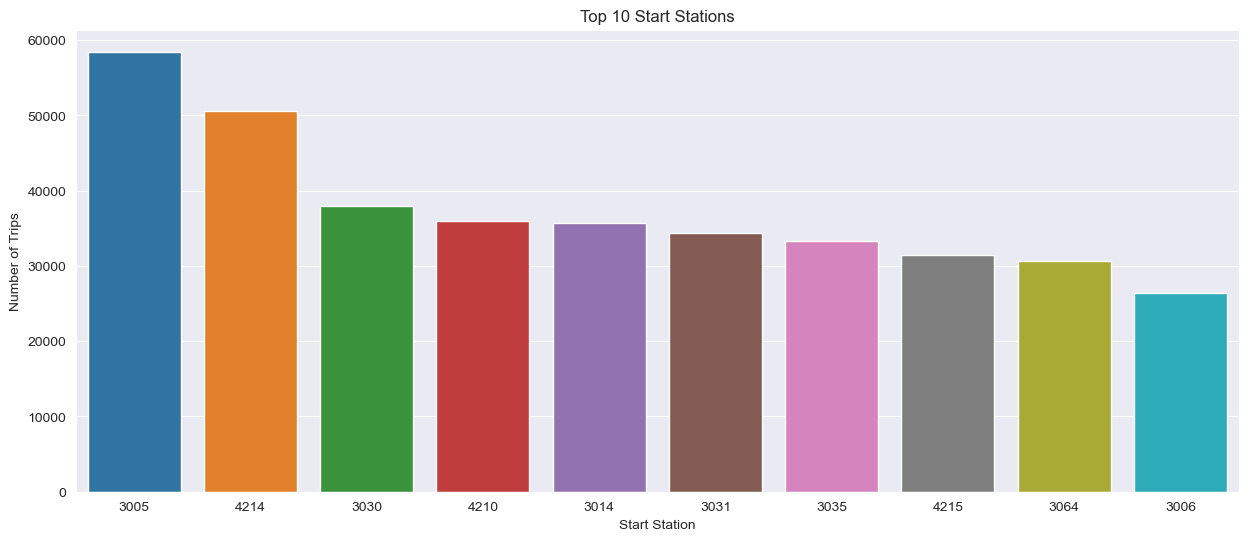

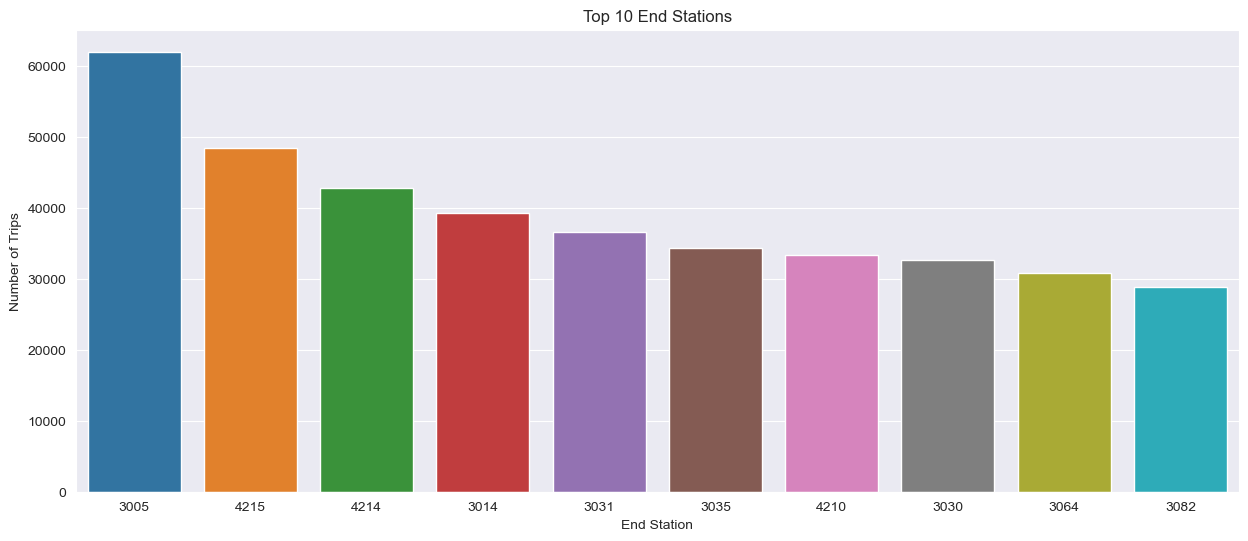

In [65]:
data = pd.read_csv('../FinalNotebook/CSV/DescriptiveAnalysis.csv', index_col=0, low_memory=False)

# Convert start_time to datetime format
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

data['trip_duration'] = (data['end_time'] - data['start_time']).dt.total_seconds() / 60

data['hour'] = data['start_time'].dt.hour
data['weekday'] = data['start_time'].dt.day_name()
data['day'] = data['start_time'].dt.day
data['month'] = data['start_time'].dt.month_name()
data['year'] = data['start_time'].dt.year

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['weekday'] = pd.Categorical(data['weekday'], categories=weekday_order, ordered=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

usage_by_hour = data['hour'].value_counts().sort_index()
usage_by_weekday = data['weekday'].value_counts().sort_index()
usage_by_day = data['day'].value_counts().sort_index()
usage_by_month = data['month'].value_counts().sort_index()
usage_by_year = data['year'].value_counts().sort_index()

usage_by_start_station = data['start_station_id'].value_counts().head(10)
usage_by_end_station = data['end_station_id'].value_counts().head(10)

bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
data['temperature_bin'] = pd.cut(data['temperature'], bins=bins, labels=labels)
usage_by_temperature = data['temperature_bin'].value_counts()


bins = [-np.inf, 0, 0.5, 2.5, 7.6, np.inf]
labels = ['No', 'Very Light', 'Light', 'Moderate', 'Heavy']
data['precipitation_category'] = pd.cut(data['precipitation'], bins=bins, labels=labels)
usage_by_precipitation = data['precipitation_category'].value_counts()

data_with_precipitation = data[data['precipitation'] > 0].copy()
bins = [0, 0.5, 2.5, 7.6, np.inf]
labels = ['Very Light', 'Light', 'Moderate', 'Heavy']
data_with_precipitation['precipitation_category'] = pd.cut(data_with_precipitation['precipitation'], bins=bins, labels=labels)
usage_by_precipitation2 = data_with_precipitation['precipitation_category'].value_counts()

cloud_cover_categories = ['Light Rain', 'Rain', 'Mostly Cloudy', 'Partly Cloudy', 'Fair', 'Cloudy', 'Heavy Rain', 'Fog', 'Haze', 'Heavy Rain / Windy']
data['cloud_cover_description'] = pd.Categorical(data['cloud_cover_description'], categories=cloud_cover_categories, ordered=True)
usage_by_cloud_cover = data['cloud_cover_description'].value_counts().sort_index()

data_without_fair = data[data['cloud_cover_description'] != 'Fair'].copy()
cloud_cover_categories2 = ['Light Rain', 'Rain', 'Mostly Cloudy', 'Partly Cloudy', 'Cloudy', 'Heavy Rain', 'Fog', 'Haze', 'Heavy Rain / Windy']
data_without_fair['cloud_cover_description'] = pd.Categorical(data_without_fair['cloud_cover_description'], categories=cloud_cover_categories2, ordered=True)
usage_by_cloud_cover2 = data_without_fair['cloud_cover_description'].value_counts().sort_index()


plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_hour.index, y=usage_by_hour.values)
plt.title('Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_weekday.index, y=usage_by_weekday.values)
plt.title('Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_day.index, y=usage_by_day.values)
plt.title('Usage by Day')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_month.index, y=usage_by_month.values)
plt.title('Usage by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_year.index, y=usage_by_year.values)
plt.title('Usage by Year')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_temperature.index, y=usage_by_temperature.values)
plt.title('Usage by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_precipitation.index, y=usage_by_precipitation.values)
plt.title('Usage by Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_precipitation2.index, y=usage_by_precipitation2.values)
plt.title('Usage by Precipitation greater than 0')
plt.xlabel('Precipitation')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_cloud_cover.index, y=usage_by_cloud_cover.values)
plt.title('Usage by Cloud Cover Description')
plt.xlabel('Cloud Cover Description')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_cloud_cover2.index, y=usage_by_cloud_cover2.values)
plt.title('Usage by Cloud Cover Description Without Fair')
plt.xlabel('Cloud Cover Description')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_start_station.index.astype(str), y=usage_by_start_station.values)
plt.title('Top 10 Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=usage_by_end_station.index.astype(str), y=usage_by_end_station.values)
plt.title('Top 10 End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.show()